In [2]:
!pip install fredapi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as md

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
from fredapi import Fred 

fred_key='26ea4e5794963461d85fb027683f75dd'

# 1) Create the Fred Object

In [2]:
fred = Fred(api_key = fred_key)

# 2) Search for Data

In [3]:
sp_search = fred.search('S&P' , order_by = 'popularity')
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2024-07-10   2024-07-10   
CSUSHPINSA              CSUSHPINSA     2024-07-10   2024-07-10   
SP500                        SP500     2024-07-10   2024-07-10   
MEHOINUSA672N        MEHOINUSA672N     2024-07-10   2024-07-10   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2024-07-10   2024-07-10   
...                            ...            ...          ...   
DDDI12SMA156NWDB  DDDI12SMA156NWDB     2024-07-10   2024-07-10   
DDDI01GTA156NWDB  DDDI01GTA156NWDB     2024-07-10   2024-07-10   
Q03069USQ605NNBR  Q03069USQ605NNBR     2024-07-10   2024-07-10   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2024-07-10   2024-07-10   
CSHMCPNPA156NRUG  CSHMCPNPA156NRUG     2024-07-10   2024-07-10   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
DDDI12SMA156NWDB  Private Credit by Deposit Money Banks and Othe...   
DDDI01GTA156NWDB  Private Credit by Deposit Money Banks to GDP f...   
Q03069USQ605NNBR  Revenue Freight Tons Originated, Less Than Car...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPNPA156NRUG  Share of Merchandise Imports at Current Purcha...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2024-07-09  Daily, Close   
CSUSHPINSA              1987-01-01      2024-04-01       Monthly   
SP500                   2014-07-10      2024-07-09  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2024-07-09  Daily, Close   
...                            ...             ...           ...   
DDDI12SMA156NWDB        2001-01-01      2020-01-01        Annual   
DDDI01GTA156NWDB        1960-01-01      2021-01-01        Annual   
Q03069USQ605NNBR        1920-01-01      1943-07-01     Quarterly   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPNPA156NRUG        1960-01-01      2019-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
DDDI12SMA156NWDB               A                         Percent   
DDDI01GTA156NWDB               A                         Percent   
Q03069USQ605NNBR               Q               Thousands of Tons   
CSHXCPVEA156NRUG               A                         Percent   
CSHMCPNPA156NRUG               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

# 3) Pull Raw Data for S&P

In [4]:
sp500=fred.get_series(series_id='SP500')
sp500

2014-07-10    1964.68
2014-07-11    1967.57
2014-07-14    1977.10
2014-07-15    1973.28
2014-07-16    1981.57
               ...   
2024-07-03    5537.02
2024-07-04        NaN
2024-07-05    5567.19
2024-07-08    5572.85
2024-07-09    5576.98
Length: 2609, dtype: float64

<Axes: title={'center': 'S&P'}, xlabel='Year', ylabel='S&P Index'>

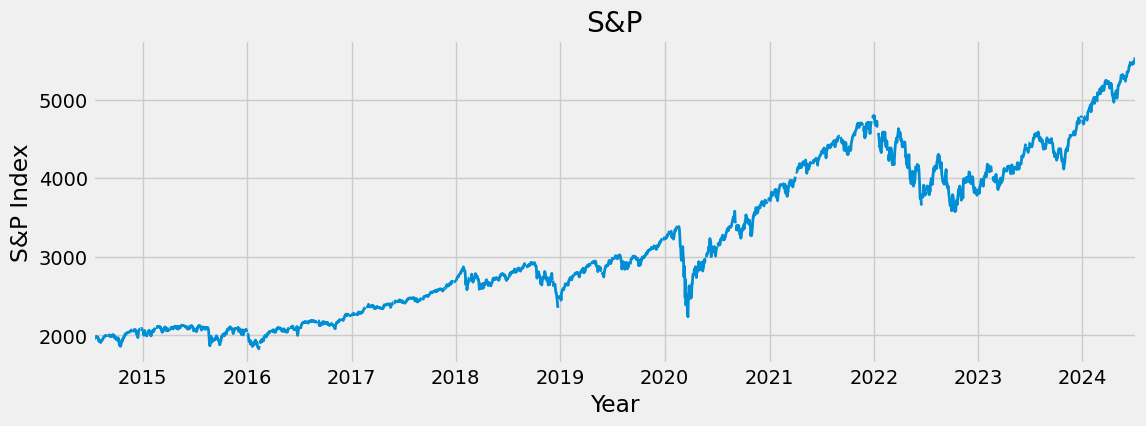

In [5]:
sp500.plot( figsize=(12,4), lw=2, title='S&P' , xlabel='Year', ylabel='S&P Index')

# OBSERVATIONS:
1) S&P Index dipped in 2020 indicating the economy took a major hit.

# 4) Search and filter dataframe for relevant data series of Unemployment Rates

In [6]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-07-10   2024-07-10   
UNRATENSA      UNRATENSA     2024-07-10   2024-07-10   
LNS14000006  LNS14000006     2024-07-10   2024-07-10   
UNEMPLOY        UNEMPLOY     2024-07-10   2024-07-10   
LNU04000006  LNU04000006     2024-07-10   2024-07-10   
...                  ...            ...          ...   
LNU04032220  LNU04032220     2024-07-10   2024-07-10   
SCMARI7URN    SCMARI7URN     2024-07-10   2024-07-10   
VAALBE7URN    VAALBE7URN     2024-07-10   2024-07-10   
HAGE124UR      HAGE124UR     2024-07-10   2024-07-10   
MIINGH5URN    MIINGH5URN     2024-07-10   2024-07-10   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LNU04032220  Unemployment Rate - Sales and Related Occupations   
SCMARI7URN              Unemployment Rate in Marion County, SC   
VAALBE7URN           Unemployment Rate in Albemarle County, VA   
HAGE124UR    Unemployment Rate in Hagerstown-Martinsburg, M...   
MIINGH5URN              Unemployment Rate in Ingham County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-06-01   Monthly               M   
UNRATENSA          1948-01-01      2024-06-01   Monthly               M   
LNS14000006        1972-01-01      2024-06-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-06-01   Monthly               M   
LNU04000006        1972-01-01      2024-06-01   Monthly               M   
...                       ...             ...       ...             ...   
LNU04032220        2000-01-01      2024-06-01   Monthly               M   
SCMARI7URN         1990-01-01      2024-05-01   Monthly               M   
VAALBE7URN         1990-01-01      2024-05-01   Monthly               M   
HAGE124UR          1990-01-01      2024-05-01   Monthly               M   
MIINGH5URN         1990-01-01      2024-05-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU04000006               Percent                  %   
...                           ...                ...   
LNU04032220               Percent                  %   
SCMARI7URN                Percent                  %   
VAALBE7URN                Percent                  %   
HAGE124UR                 Percent                  %   
MIINGH5URN                Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU04000006       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
LNU04032220       Not Seasonally Adjusted                       NSA   
SCMARI7URN        Not Seasonally Adjusted                       NSA   
VAALBE7URN        N

In [7]:
unemp_statewise = unemp_df[(unemp_df['seasonal_adjustment'] == "Seasonally Adjusted") 
                    & (unemp_df['units']=="Percent") 
                    & (unemp_df['title'].str.contains('Unemployment Rate'))
                    & (unemp_df['id'].str.len()==4)]
code_to_name = unemp_statewise.title.str.replace('Unemployment Rate in ','').to_dict()
del code_to_name['PRUR']
code_to_name['DCUR']='District Of Columbia'

# 5) Join all filtered data series in a new dataframe

In [8]:
all_results=[]
for series_id in code_to_name.keys():
    results=fred.get_series(series_id).to_frame(name = code_to_name[series_id])
    all_results.append(results)

In [9]:
unemp_results = pd.concat(all_results, axis=1)
unemp_states = unemp_results.dropna()
unemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-01-01         5.2    3.9       4.5      3.1           3.4   3.7   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2024-01-01       4.0      2.9            3.0             3.5       4.7   
2024-02-01       3.9      3.0            2.9             3.5       4.8   
2024-03-01       3.9      3.0            2.9             3.5       4.8   
2024-04-01       3.9      3.1            2.9             3.5       4.8   
2024-05-01       3.9      3.0            3.0             3.6       4.9   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   
...                ...      ...       ...      ...        ...       ...   
2024-01-01         4.8      3.1       3.4      4.2        3.2       3.0   
2024-02-01         4.8      3.1       3.5      4.1        3.0       3.0   
2024-03-01         4.8      3.1       3.7      3.8        3.0       2.9   
2024-04-01         4.7      3.1       3.7      3.6        2.9       2.8   
2024-05-01         4.6      3.2       3.8      3.4        2.9       2.7   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   
...              ...             ...         ...        ...        ...   
2024-01-01       4.3             3.0         4.0        2.7        3.5   
2024-02-01       4.4             3.1         3.9        2.7        3.3   
2024-03-01       4.5             3.1         3.8        2.7        3.2   
2024-04-01       4.6             3.2         3.8        2.7        3.1   
2024-05-01       4.6             3.4         3.8        2.8        3.0   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   
...   

# 6) Plotting statewise unemployment rate data

In [10]:
px.line(unemp_states)

C:\Users\Manan Verma\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# OBSERVATIONS:
1) Effect of Economic Recession of 1980-1985 on Unemployment Rates.
2) Effect of COVID_19 on Unemployment Rates during 2019-2021.
3) COVID-19 led to highest unemployment rate in May, 2020.

<Axes: title={'center': 'Unemployment Rate, May 2020'}, xlabel='Unemployment %age', ylabel='States'>

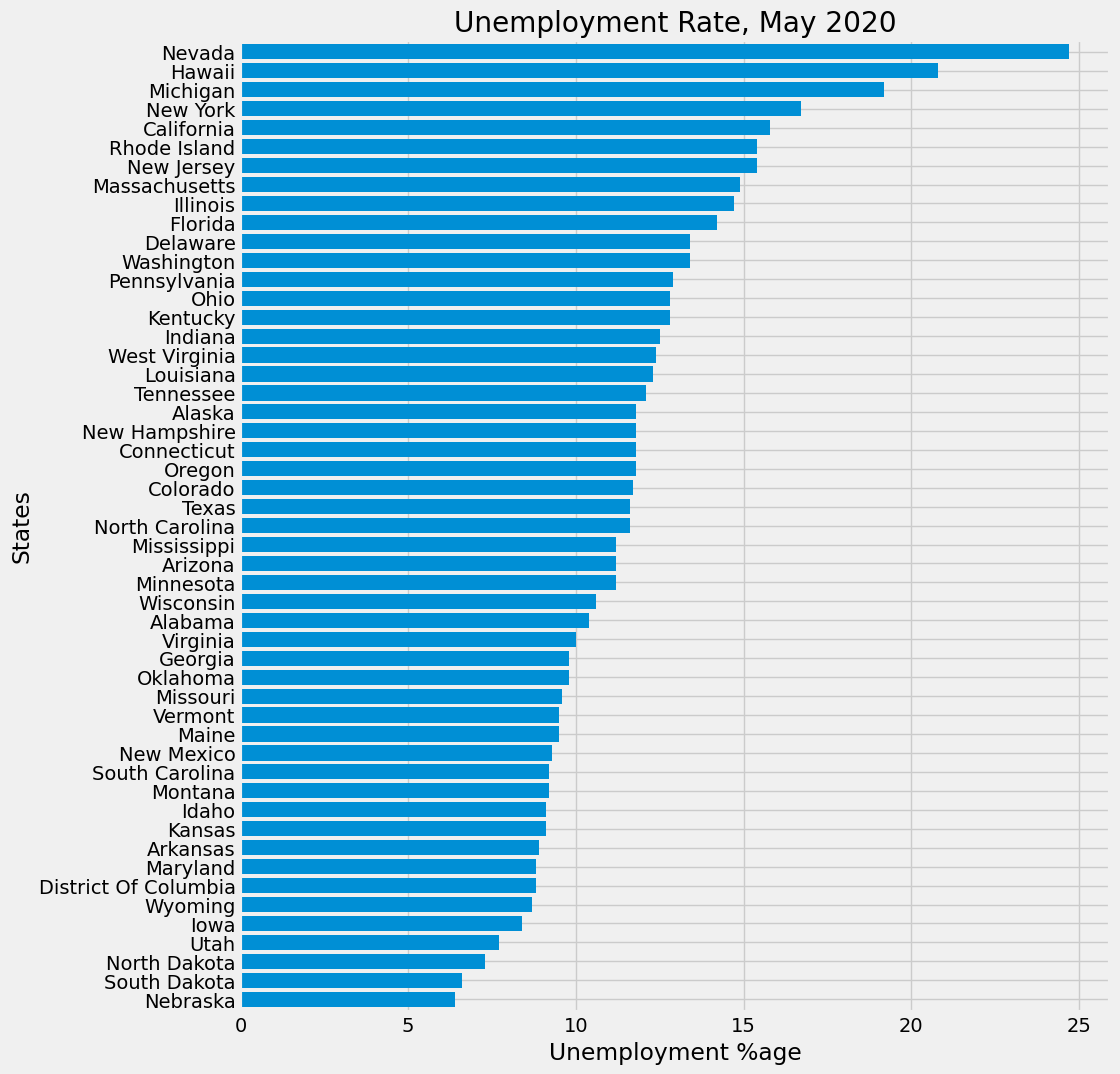

In [11]:
unemp_states.T['2020-05-01'].sort_values().plot(kind='barh', figsize=(10,12), width=0.8, title='Unemployment Rate, May 2020', xlabel='Unemployment %age', ylabel='States')

# 7) Pull Participation Rate

In [12]:
part_df=fred.search('participation rate state' , filter=('frequency','Monthly'))
part_df

id realtime_start realtime_end  \
series id                                                                    
T10YIEM                                T10YIEM     2024-07-10   2024-07-10   
CIVPART                                CIVPART     2024-07-10   2024-07-10   
LNU01300000                        LNU01300000     2024-07-10   2024-07-10   
T5YIEM                                  T5YIEM     2024-07-10   2024-07-10   
LNS11300060                        LNS11300060     2024-07-10   2024-07-10   
...                                        ...            ...          ...   
SMU42165400000000001SA  SMU42165400000000001SA     2024-07-10   2024-07-10   
SMU37351000000000001SA  SMU37351000000000001SA     2024-07-10   2024-07-10   
SMU51444200000000001SA  SMU51444200000000001SA     2024-07-10   2024-07-10   
SMU12427000000000001SA  SMU12427000000000001SA     2024-07-10   2024-07-10   
SMU36205240000000001SA  SMU36205240000000001SA     2024-07-10   2024-07-10   

                                                                    title  \
series id                                                                   
T10YIEM                                  10-Year Breakeven Inflation Rate   
CIVPART                                    Labor Force Participation Rate   
LNU01300000                                Labor Force Participation Rate   
T5YIEM                                    5-Year Breakeven Inflation Rate   
LNS11300060                   Labor Force Participation Rate - 25-54 Yrs.   
...                                                                   ...   
SMU42165400000000001SA  All Employees: Total Nonfarm in Chambersburg-W...   
SMU37351000000000001SA  All Employees: Total Nonfarm in New Bern, NC (...   
SMU51444200000000001SA  All Employees: Total Nonfarm in Staunton-Wayne...   
SMU12427000000000001SA  All Employees: Total Nonfarm in Sebring, FL (MSA)   
SMU36205240000000001SA  All Employees: Total Nonfarm in Dutchess Count...   

                       observation_start observation_end frequency  \
series id                                                            
T10YIEM                       2003-01-01      2024-06-01   Monthly   
CIVPART                       1948-01-01      2024-06-01   Monthly   
LNU01300000                   1948-01-01      2024-06-01   Monthly   
T5YIEM                        2003-01-01      2024-06-01   Monthly   
LNS11300060                   1948-01-01      2024-06-01   Monthly   
...                                  ...             ...       ...   
SMU42165400000000001SA        1990-01-01      2024-05-01   Monthly   
SMU37351000000000001SA        1990-01-01      2024-05-01   Monthly   
SMU51444200000000001SA        1990-01-01      2024-05-01   Monthly   
SMU12427000000000001SA        1990-01-01      2024-05-01   Monthly   
SMU36205240000000001SA        1990-01-01      2024-05-01   Monthly   

                       frequency_short                 units  \
series id                                                      
T10YIEM                              M               Percent   
CIVPART                              M               Percent   
LNU01300000                          M               Percent   
T5YIEM                               M               Percent   
LNS11300060                          M               Percent   
...                                ...                   ...   
SMU42165400000000001SA               M  Thousands of Persons   
SMU37351000000000001SA               M  Thousands of Persons   
SMU51444200000000001SA               M  Thousands of Persons   
SMU12427000000000001SA               M  Thousands of Persons   
SMU36205240000000001SA               M  Thousands of Persons   

                              units_short      seasonal_adjustment  \
series id                                                            
T10YIEM                                 %  Not Seasonally Adjusted   
CIVPART                                 %      Seasonally Adjusted   
LNU

In [13]:
part_statewise = part_df[(part_df['seasonal_adjustment'] == "Seasonally Adjusted") 
                    & (part_df['units']=="Percent") 
                    & (part_df['title'].str.contains('Participation Rate for'))]
id_to_state= part_statewise.title.str.replace('Labor Force Participation Rate for ','').to_dict()
id_to_state

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA36': 'New York',
 'LBSSA26': 'Michigan',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA27': 'Minnesota',
 'LBSSA24': 'Maryland',
 'LBSSA54': 'West Virginia',
 'LBSSA47': 'Tennessee',
 'LBSSA23': 'Maine',
 'LBSSA17': 'Illinois',
 'LBSSA37': 'North Carolina',
 'LBSSA13': 'Georgia',
 'LBSSA22': 'Louisiana',
 'LBSSA45': 'South Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA49': 'Utah',
 'LBSSA51': 'Virginia',
 'LBSSA18': 'Indiana',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA04': 'Arizona',
 'LBSSA35': 'New Mexico',
 'LBSSA16': 'Idaho',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA31': 'Nebraska',
 'LBSSA15': 'Hawaii',
 'LBSSA32': 'Nevada',
 'LBSSA30': 'Montana',
 'LBSSA41': 'Oregon',
 'LBSSA33'

In [14]:
all_part_results=[]
for series_id in id_to_state.keys():
    results=fred.get_series(series_id).to_frame(name=id_to_state[series_id])
    all_part_results.append(results)

In [15]:
part_results = pd.concat(all_part_results, axis=1)
part_states = part_results.dropna()
part_states

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   
...                ...      ...       ...       ...          ...    ...   
2024-01-01        62.1     57.4      61.4      62.3         53.8   64.1   
2024-02-01        62.1     57.4      61.4      62.2         53.7   64.1   
2024-03-01        62.0     57.4      61.4      62.3         53.7   64.1   
2024-04-01        62.0     57.5      61.3      62.3         53.7   64.2   
2024-05-01        62.0     57.5      61.3      62.3         53.8   64.2   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1976-01-01     55.8      60.5  61.7       65.6          58.4           64.8   
1976-02-01     55.7      60.3  61.7       65.5          58.3           64.7   
1976-03-01     55.5      60.2  61.7       65.4          58.3           64.6   
1976-04-01     55.5      60.1  61.6       65.4          58.3           64.6   
1976-05-01     55.4      60.1  61.6       65.5          58.3           64.6   
...             ...       ...   ...        ...           ...            ...   
2024-01-01     59.4      56.9  61.8       65.9          62.4           64.9   
2024-02-01     59.4      56.9  61.8       65.7          62.5           64.8   
2024-03-01     59.4      56.9  61.8       65.6          62.7           64.9   
2024-04-01     59.3      57.1  61.8       65.6          62.9           65.1   
2024-05-01     59.1      57.2  61.9       65.6          62.9           65.3   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1976-01-01       65.6      64.3           52.5       59.6   62.1      63.0   
1976-02-01       65.5      64.2           52.4       59.4   61.9      63.0   
1976-03-01       65.4      64.1           52.3       59.3   61.9      62.9   
1976-04-01       65.4      64.1           52.3       59.3   61.8      62.9   
1976-05-01       65.5      64.1           52.2       59.4   61.7      63.0   
...               ...       ...            ...        ...    ...       ...   
2024-01-01       68.0      65.1           55.3       59.5   59.3      64.6   
2024-02-01       67.9      65.0           55.2       59.5   59.3      64.6   
2024-03-01       68.0      65.0           55.2       59.6   59.3      64.6   
2024-04-01       68.0      65.2           55.2       59.6   59.4      64.7   
2024-05-01       68.0      65.3           55.1       59.6   59.5      64.9   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1976-01-01            66.5     63.7       56.8            65.3      67.2   
1976-02-01            66.3     63.6       56.6            65.2      67.0   
1976-03-01            66.2     63.5       56.5            65.0      66.8   
1976-04-01            66.2     63.5       56.4            64.9      66.6   
1976-05-01            66.3     63.6       56.4            64.7      66.5   
...                    ...      ...        ...             ...       ...   
2024-01-01            60.7     61.4       58.7            57.2      68.1   
2024-02-01            60.7     61.4       58.7            57.1      68.1   
2024-03-01            60.6     61.4       58.7            57.1      68.0   
2024-04-01            60.6     61.5       58.8            57.2      68.0   
2024-05-01            60.5     61.6       58.6            57.2      67.9   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1976-01-01  62.8      65.9     64.0      60.5        61.5  64.4    69.0   
1976-02-01  62.6      65.8     63.9      60.3        61.4  64.3    68.4   
1976-03-01  62.5      65.6     63.8      60.3        61.4  64.2    67.8   
1976-04-01  

# 8) Unemployment vs Participation during COVID-19

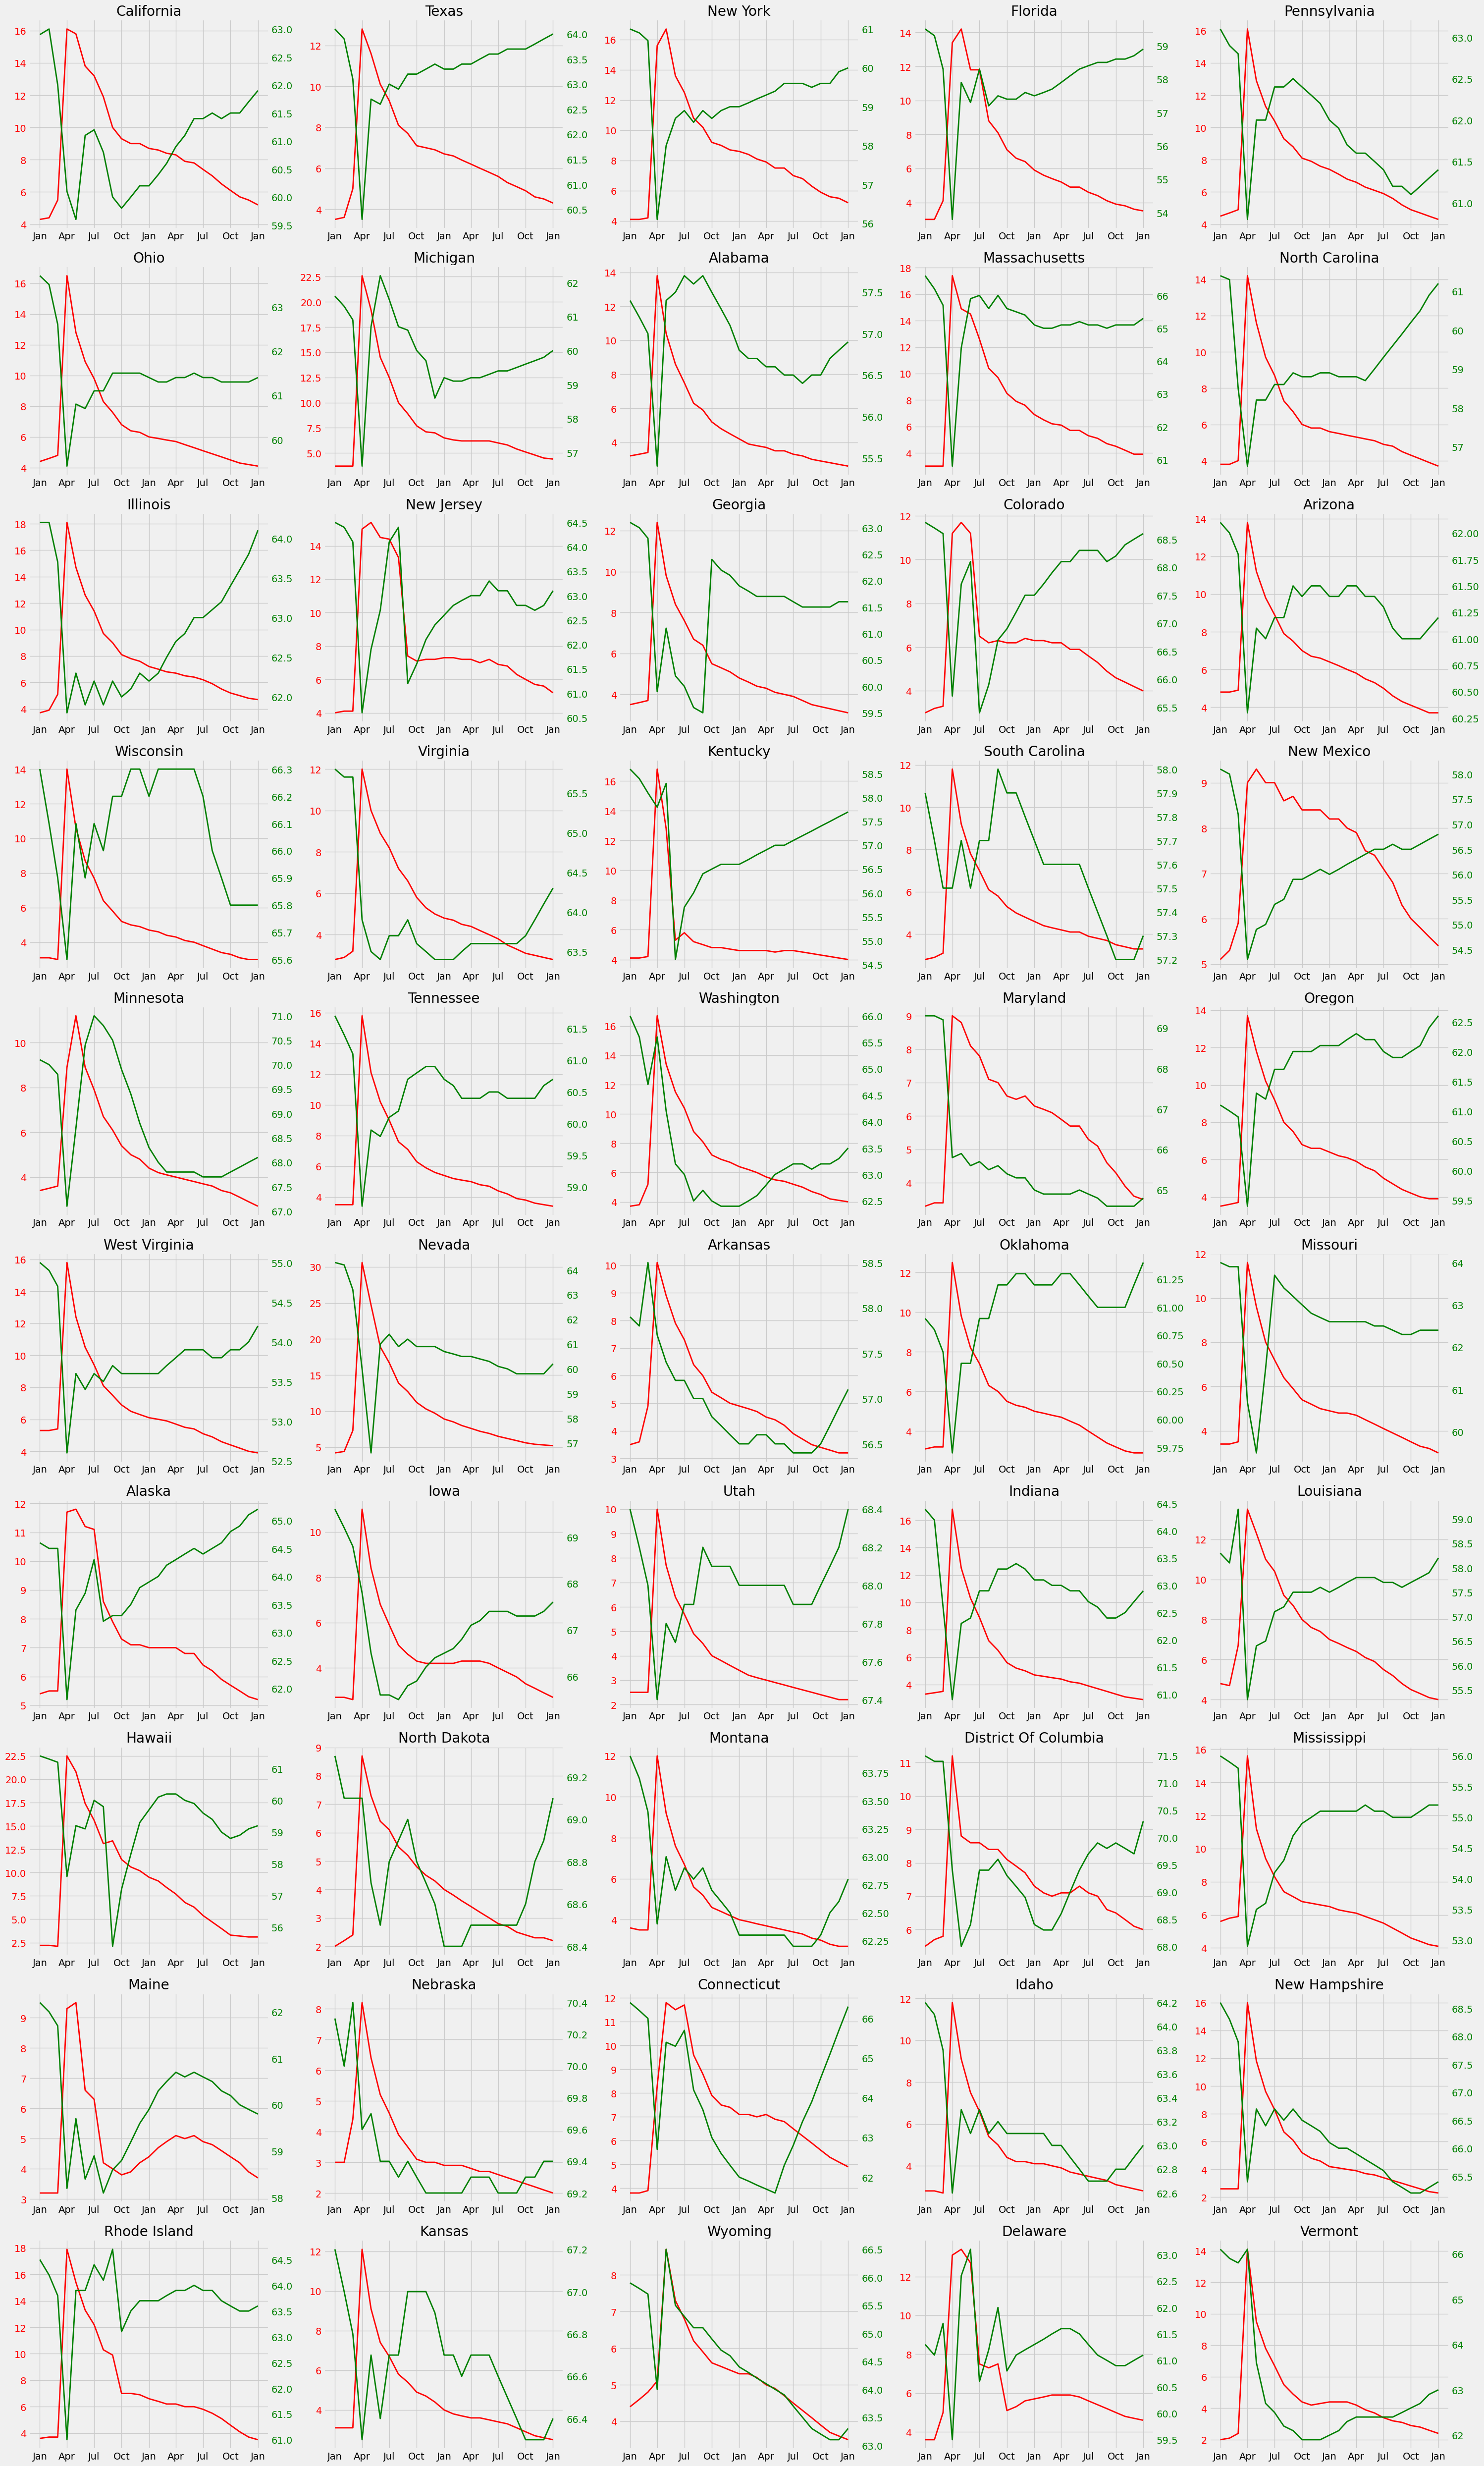

In [18]:
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
axs=axs.flatten()
i=0
for state in unemp_states.keys():
    if i>=len(axs):
        break
    # Plot the unemployment data on the first y-axis
    ax1=axs[i]
    ax1.plot(unemp_states.query('index >= 2020 and index <= 2022')[state], lw=2, label='Unemployment', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    
    # Create a second y-axis sharing the same x-axis
    ax2 = axs[i].twinx()
    ax2.plot(part_states.query('index >= 2020 and index <= 2022')[state], lw=2, label='Participation', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.grid(False)
    
    ax1.set_title(state)
    ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
    
    i+=1
plt.tight_layout()
plt.show()

# FINAL OBSERVATIONS:
1) COVID-19 had a significant adverse impact on US economy in 2020.
2) S&P Index fell by upto 1300 points
3) Unemployment rates in most states increased upto 24% with Nevada showing the strongest impact.
4) Labor Participation rates fell by upto 7.2% with Nevada showing the strongest impact.
5) Nevada took the strongest hit which can be explained by tourist reductions due to lockdown.
6) The economy started to recover in late 2020 and almost made full recovery by 2021.